In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
df_region = pd.read_csv("Region.csv")
df = df_region.copy()
df = df.groupby('province')[['elementary_school_count', 'kindergarten_count', 'university_count', 'nursing_home_count']].sum()

In [4]:
df3 = df_region.copy()
df3 = df3.groupby('province')[['academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio']].mean()
df[['academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio']] = df3[['academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio']]

In [5]:
df

,elementary_school_count,kindergarten_count,university_count,nursing_home_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio
province,,,,,,,
Busan,608,816,44,13504,1.327647,19.357647,9.094118
Chungcheongbuk-do,518,656,34,5538,1.023333,23.192500,11.825000
Chungcheongnam-do,818,998,42,7282,1.122500,23.844375,11.706250
Daegu,458,710,22,10166,1.713333,17.031111,7.966667
Daejeon,296,520,30,5968,1.425000,14.376667,6.200000
Gangwon-do,698,736,36,5038,1.116842,22.890526,11.578947
Gwangju,310,624,34,5704,2.473333,14.815000,6.716667
Gyeonggi-do,2554,4474,122,40982,1.420625,14.429688,6.084375
Gyeongsangbuk-do,942,1414,66,8948,0.948750,27.556250,15.133333


In [6]:
raw_caseregion=pd.read_csv('TimeProvince.csv')
start_date='2020-04-16'
end_date='2020-04-30'

In [7]:
caseregion_16=raw_caseregion.loc[(raw_caseregion.date==start_date)]
caseregion_30=raw_caseregion.loc[(raw_caseregion.date==end_date)]
caseregion_30['old_con']=caseregion_16['confirmed'].values
caseregion_30['old_re']=caseregion_16['released'].values
caseregion_30['old_de']=caseregion_16['deceased'].values
caseregion_30['con_grow']=(caseregion_30.confirmed-caseregion_16['confirmed'].values)/caseregion_16['confirmed'].values
caseregion_30['re_grow']=(caseregion_30.released-caseregion_16['released'].values)/caseregion_16['released'].values
caseregion_30['de_grow']=(caseregion_30.deceased-caseregion_16['deceased'].values)/caseregion_16['deceased'].values
caseregion_30['de_rate']=caseregion_30.deceased/caseregion_30.confirmed

In [8]:
caseregion_30.fillna(0,inplace=True)
region_df=pd.merge(caseregion_30,df,left_on='province',right_index=True)


In [9]:
patient_info = pd.read_csv("PatientInfo.csv")
infected=patient_info[['patient_id']].loc[patient_info['infected_by']!='nan'] \
                                .groupby(patient_info['infected_by']) \
                                .count()
patient_info['count']=infected['patient_id']
infect=pd.merge(infected,patient_info,left_index=True,right_on='patient_id').sort_values('patient_id_x', ascending=False)

In [10]:
R = infect[['patient_id_x']].groupby(infect['province']).mean().sort_values('patient_id_x', ascending=False)
region_df = region_df.set_index('province')

In [11]:
region_df['R'] = R

In [12]:
region_df.fillna(0, inplace=True)

In [13]:
region_df

,date,time,confirmed,released,deceased,old_con,old_re,old_de,con_grow,re_grow,de_grow,de_rate,elementary_school_count,kindergarten_count,university_count,nursing_home_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,R
province,,,,,,,,,,,,,,,,,,,,
Seoul,2020-04-30,0,633,453,2,619,250,2,0.022617,0.812000,0.000000,0.003160,1214,1660,96,45478,1.360000,15.738077,5.923077,1.755556
Busan,2020-04-30,0,137,116,3,130,111,3,0.053846,0.045045,0.000000,0.021898,608,816,44,13504,1.327647,19.357647,9.094118,1.500000
Daegu,2020-04-30,0,6852,6144,172,6827,5586,158,0.003662,0.099893,0.088608,0.025102,458,710,22,10166,1.713333,17.031111,7.966667,17.000000
Incheon,2020-04-30,0,93,68,0,88,51,0,0.056818,0.333333,0.000000,0.000000,500,806,14,8994,1.054545,16.399091,7.236364,1.200000
Gwangju,2020-04-30,0,30,27,0,28,22,0,0.071429,0.227273,0.000000,0.000000,310,624,34,5704,2.473333,14.815000,6.716667,2.000000
Daejeon,2020-04-30,0,40,35,0,39,25,0,0.025641,0.400000,0.000000,0.000000,296,520,30,5968,1.425000,14.376667,6.200000,1.333333
Ulsan,2020-04-30,0,43,37,1,42,34,1,0.023810,0.088235,0.000000,0.023256,238,400,8,3602,2.111667,11.773333,5.166667,1.714286
Sejong,2020-04-30,0,46,38,0,46,21,0,0.000000,0.809524,0.000000,0.000000,48,60,3,491,1.780000,9.480000,3.800000,1.500000
Gyeonggi-do,2020-04-30,0,676,486,15,649,330,14,0.041602,0.472727,0.071429,0.022189,2554,4474,122,40982,1.420625,14.429688,6.084375,2.990196


In [41]:
cluster_df = region_df[['confirmed', 'released', 'deceased', 'R']]

In [42]:
#region_df=region_df.iloc[:,1:]
#cluster_df=region_df.iloc[:,1:]

In [43]:
cluster_df

,confirmed,released,deceased,R
province,,,,
Seoul,633,453,2,1.755556
Busan,137,116,3,1.500000
Daegu,6852,6144,172,17.000000
Incheon,93,68,0,1.200000
Gwangju,30,27,0,2.000000
Daejeon,40,35,0,1.333333
Ulsan,43,37,1,1.714286
Sejong,46,38,0,1.500000
Gyeonggi-do,676,486,15,2.990196


In [44]:
from sklearn import preprocessing
t= preprocessing.StandardScaler().fit(cluster_df)
cluster_df=t.transform(cluster_df)

In [45]:
from sklearn.cluster import KMeans

In [48]:
res = KMeans(random_state=2498,n_clusters=4).fit(cluster_df)
region_df['label'] = res.labels_

In [49]:
region_df

,date,time,confirmed,released,deceased,old_con,old_re,old_de,con_grow,re_grow,...,de_rate,elementary_school_count,kindergarten_count,university_count,nursing_home_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,R,label
province,,,,,,,,,,,,,,,,,,,,,
Seoul,2020-04-30,0,633,453,2,619,250,2,0.022617,0.812000,...,0.003160,1214,1660,96,45478,1.360000,15.738077,5.923077,1.755556,0
Busan,2020-04-30,0,137,116,3,130,111,3,0.053846,0.045045,...,0.021898,608,816,44,13504,1.327647,19.357647,9.094118,1.500000,3
Daegu,2020-04-30,0,6852,6144,172,6827,5586,158,0.003662,0.099893,...,0.025102,458,710,22,10166,1.713333,17.031111,7.966667,17.000000,1
Incheon,2020-04-30,0,93,68,0,88,51,0,0.056818,0.333333,...,0.000000,500,806,14,8994,1.054545,16.399091,7.236364,1.200000,3
Gwangju,2020-04-30,0,30,27,0,28,22,0,0.071429,0.227273,...,0.000000,310,624,34,5704,2.473333,14.815000,6.716667,2.000000,3
Daejeon,2020-04-30,0,40,35,0,39,25,0,0.025641,0.400000,...,0.000000,296,520,30,5968,1.425000,14.376667,6.200000,1.333333,3
Ulsan,2020-04-30,0,43,37,1,42,34,1,0.023810,0.088235,...,0.023256,238,400,8,3602,2.111667,11.773333,5.166667,1.714286,3
Sejong,2020-04-30,0,46,38,0,46,21,0,0.000000,0.809524,...,0.000000,48,60,3,491,1.780000,9.480000,3.800000,1.500000,3
Gyeonggi-do,2020-04-30,0,676,486,15,649,330,14,0.041602,0.472727,...,0.022189,2554,4474,122,40982,1.420625,14.429688,6.084375,2.990196,0


In [50]:
import geopandas as gpd
shp = gpd.read_file("skorea-provinces.geojson")
shp = shp[['name_eng', 'geometry']]
geo = {ind: region_df.label[ind] for ind in region_df.index}
shp['label'] = shp.name_eng.map(geo)

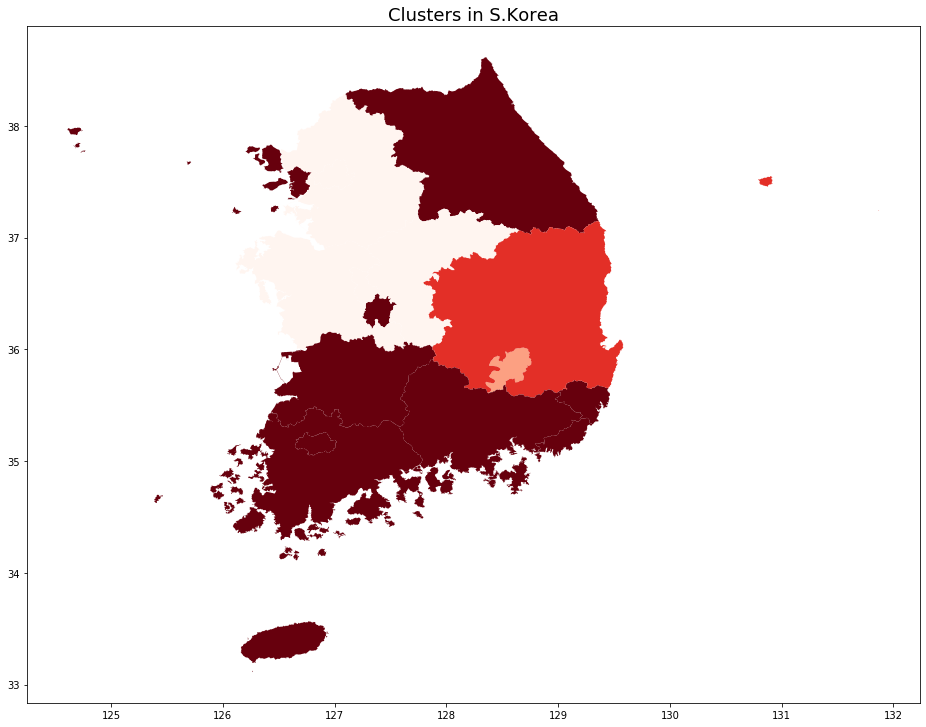

In [51]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, figsize=(16, 16))
ax.set_title("Clusters in S.Korea", fontsize=18)
shp.plot(axes=ax, column='label', cmap='Reds')

In [119]:
region_df.drop('time', axis=1, inplace=True)

In [121]:
label = region_df['label']
region_df.drop('label', axis=1, inplace=True)

In [124]:
region_df

,confirmed,released,deceased,old_con,old_re,old_de,con_grow,re_grow,de_grow,de_rate,elementary_school_count,kindergarten_count,university_count,nursing_home_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,R
province,,,,,,,,,,,,,,,,,,
Seoul,633,453,2,619,250,2,0.022617,0.812000,0.000000,0.003160,1214,1660,96,45478,1.360000,15.738077,5.923077,1.755556
Busan,137,116,3,130,111,3,0.053846,0.045045,0.000000,0.021898,608,816,44,13504,1.327647,19.357647,9.094118,1.500000
Daegu,6852,6144,172,6827,5586,158,0.003662,0.099893,0.088608,0.025102,458,710,22,10166,1.713333,17.031111,7.966667,17.000000
Incheon,93,68,0,88,51,0,0.056818,0.333333,0.000000,0.000000,500,806,14,8994,1.054545,16.399091,7.236364,1.200000
Gwangju,30,27,0,28,22,0,0.071429,0.227273,0.000000,0.000000,310,624,34,5704,2.473333,14.815000,6.716667,2.000000
Daejeon,40,35,0,39,25,0,0.025641,0.400000,0.000000,0.000000,296,520,30,5968,1.425000,14.376667,6.200000,1.333333
Ulsan,43,37,1,42,34,1,0.023810,0.088235,0.000000,0.023256,238,400,8,3602,2.111667,11.773333,5.166667,1.714286
Sejong,46,38,0,46,21,0,0.000000,0.809524,0.000000,0.000000,48,60,3,491,1.780000,9.480000,3.800000,1.500000
Gyeonggi-do,676,486,15,649,330,14,0.041602,0.472727,0.071429,0.022189,2554,4474,122,40982,1.420625,14.429688,6.084375,2.990196


In [122]:
scaler = preprocessing.StandardScaler().fit(region_df)
X = scaler.transform(region_df)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.36061
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.63939
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000


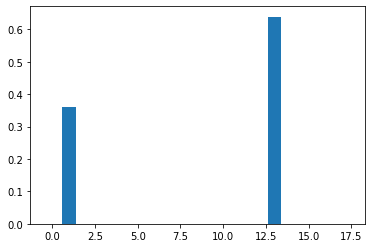

In [123]:
# decision tree for feature importance on a classification problem
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

model = DecisionTreeClassifier().fit(X, label)
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.05031
Feature: 1, Score: 0.09350
Feature: 2, Score: 0.07962
Feature: 3, Score: 0.05398
Feature: 4, Score: 0.07240
Feature: 5, Score: 0.11730
Feature: 6, Score: 0.00532
Feature: 7, Score: 0.01486
Feature: 8, Score: 0.04241
Feature: 9, Score: 0.00263
Feature: 10, Score: 0.08694
Feature: 11, Score: 0.08174
Feature: 12, Score: 0.09120
Feature: 13, Score: 0.07720
Feature: 14, Score: 0.01920
Feature: 15, Score: 0.01448
Feature: 16, Score: 0.04309
Feature: 17, Score: 0.05384


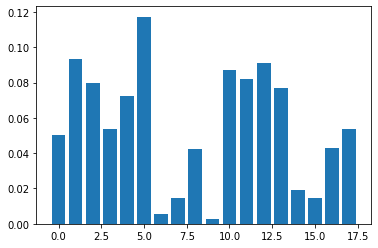

In [125]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

model = RandomForestClassifier().fit(X, label)
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.19895
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.06214
Feature: 7, Score: 0.01770
Feature: 8, Score: 0.04673
Feature: 9, Score: 0.04695
Feature: 10, Score: 0.12619
Feature: 11, Score: 0.06602
Feature: 12, Score: 0.04518
Feature: 13, Score: 0.14538
Feature: 14, Score: 0.06094
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.11356
Feature: 17, Score: 0.07025


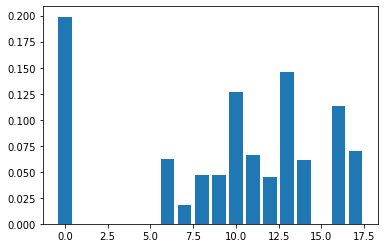

In [126]:
from xgboost import XGBClassifier
from matplotlib import pyplot

model = XGBClassifier().fit(X, label)
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()